In [49]:
import base64

# PyTorch

To more conveniently use arrays in Python, we will use the PyTorch numerical computing framework. To install it, go to https://pytorch.org/get-started and follow the instructions for your system. Once we have PyTorch installed, we import `torch` to use PyTorch.

In [1]:
import torch
import torch.utils.data as data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [8]:
a = torch.tensor([[8, 4], [-2, -9]])
# if I have only one dimension, I use this one to add both rows of a
b = torch.tensor([6, 10])
# regular element-wise addition
c = torch.tensor([[6, 10], [3,4]])
print(a + b)
print(a + c)

tensor([[14, 14],
        [ 4,  1]])
tensor([[14, 14],
        [ 1, -5]])


In [5]:
a = torch.tensor([[8, 4], [-2, -9]])
b = torch.tensor([6, 10])
print(b)
print(b[:, None]) # this returns 
#tensor([[ 6],
#        [10]])
# 2 rows 1 col
# None adds one dimension-axis
# Now I have 2 rows 1 col
# So I use the element from the first row to add both elements of the first row of a 
# and the first element of the 2nd row to add both elements of the second row of a.
print(a + b[:, None])
print(b.shape) # torch.Size([2]) (meaning it has only one dimension and 2 elements in that dimension)
print(a.shape) # torch.Size([2, 2]) meaning it has two dimensions and 2 elements per dimension

#The first element of the tuple, 2, represents the size of the tensor along the first dimension (number of rows), 
#and the second element, 3, represents the size of the tensor along the second dimension (number of columns).

#So, the output of print(a.shape) will be (2, 3).

#You can also access individual elements of the shape tuple using indexing. For example, a.shape[0] gives the size of 
#the tensor along the first dimension, and a.shape[1] gives the size along the second dimension.

tensor([ 6, 10])
tensor([[ 6],
        [10]])
tensor([[14, 10],
        [ 8,  1]])
torch.Size([2])
torch.Size([2, 2])


Install the following if necessary.
* `matplotlib` for plotting. Install it using `pip install matplotlib`. Or `conda install matplotlib` if you prefer.
* `tqdm` has a stupid name but provides a nice progress bar. `pip install tqdm`

In [12]:
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm
import time


In [14]:

for i in tqdm(range(10)):
    time.sleep(0.5)

# I was initially getting this error
#TypeError                                 Traceback (most recent call last)
#Cell In[11], line 1
#----> 1 for i in tqdm(range(10)):
#      2     time.sleep(0.5)

#TypeError: 'module' object is not callable

#The error you encountered, 'module' object is not callable, suggests that you might have a naming conflict or have 
# imported the wrong module.

# In this case, it seems like you have imported the tqdm module itself INSTEAD OF THE tqdm FUNCTION FROM THE MODULE.
# The error message indicates that you are trying to use tqdm as a callable, which is not possible when it refers to 
# the module object.

# solution: from tqdm import tqdm

100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


## Messing with Tensors

The most important data structure in PyTorch is the `Tensor`, which is an array of numbers, all of the same type, usually some kind of floating-point number. In the machine learning community, such arrays are often called *tensors*, even when they aren't being used to represent mathematical [tensors](https://en.wikipedia.org/wiki/Tensor), which are linear maps.

You can create `Tensor`s by passing in Python `tuple`s or `list`s to the `tensor` function.

In [24]:
a = torch.tensor((1, 2, 3, 4))
b = torch.tensor((( 5,  6,  7,  8),
                  (-5, -6, -7, -8)))
c = torch.tensor([[1],
                  [2]])

# In the statement a = torch.tensor((1, 2, 3, 4)), torch represents the module, while tensor is a factory function or 
# constructor within the torch module.

# In PyTorch, torch is the top-level package for the PyTorch library. It provides a variety of functionality for tensor 
# computations, neural networks, and other machine learning operations.

# The tensor function is one of the many functions provided by the torch module. It is used to create a new tensor object. 
# In the given example, the torch.tensor() function is called with (1, 2, 3, 4) as its argument, which creates a new 
# tensor object a with the values (1, 2, 3, 4).

All `Tensor`s have `shape`s. Here are their shapes.

In [16]:
a.shape, b.shape

(torch.Size([4]), torch.Size([2, 4]))

You can add, subtract, and negate `Tensor`s using + and -.

In [17]:
a + a, a - a

(tensor([2, 4, 6, 8]), tensor([0, 0, 0, 0]))

Broadcasting is applied automatically where it's unambiguous. (Read the 2_math_review notebook if you are unsure what broadcasting does.)

In [18]:
a + b
# we add the a row to each of the 2 b rows (col by col)

tensor([[ 6,  8, 10, 12],
        [-4, -4, -4, -4]])

Matrix multiplication can be done using the `@` operator.

In [19]:
b @ a

tensor([ 70, -70])

Element-wise multiplication is automatically broadcasted.

In [28]:
# Broadcasting depends on the orientation of the vector whether is a column or row vector
a * b

tensor([[  5,  12,  21,  32],
        [ -5, -12, -21, -32]])

In [27]:
c * b

tensor([[  5,   6,   7,   8],
        [-10, -12, -14, -16]])

You can select elements or slices of `Tensor`s using`[index]`. This `index` can be a variety of things. I'll show you a few examples.

In [29]:
b[0, 0]

tensor(5)

In [30]:
index = (0, 0)
b[index]

tensor(5)

In [31]:
b[1, :] # second row (0 indexed), the whole col

tensor([-5, -6, -7, -8])

In [33]:
b[:, 1] # all rows, second column

tensor([ 6, -6])

In [35]:
b[:, :2] # from start till 2 -> :2 ... from 2 till end 2: ..... #0:3:2 from 0 to 3 (exclusive I believe) with setps of 2
# all rows, and cols 0 - 1 (2 is exclusive)

tensor([[ 5,  6],
        [-5, -6]])

In [36]:
b[:, :3:2] #0:3:2 from 0 to 3 (exclusive I believe) with setps of 2

tensor([[ 5,  7],
        [-5, -7]])

In [40]:
b[:, 2:] # all rows and from 2 to end (inclusive) 

tensor([[ 7,  8],
        [-7, -8]])

See PyTorch's [Tensor indexing API](https://pytorch.org/cppdocs/notes/tensor_indexing.html) for more examples.

# Gradient descent

Gradient descent is an optimization method that adjusts the parameters of a differentiable function that captures some sort of "loss," or the error of an estimation, in order to optimize it. [Here](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) is a nice YouTube playlist about it by 3Blue1Brown. I'll demonstrate it through a regression task. Regression is predicting a real number or real array.

Suppose there were some function $f$ that maps real numbers to real numbers. That is, $f: \mathbb{R} \to \mathbb{R}$. Let's make an $f$ that is actually $e^x +$ some random noise.

In [41]:
def f(x: torch.Tensor) -> torch.Tensor:
    # input parameter: instead of data_type param_name is param_name: data_type
    """
    :returns: e^x + some random noise


    The notation you provided is a function signature in Python. Let's break it down:

    def: This keyword is used to define a function in Python.
    f: This is the name of the function.
    (x: torch.Tensor): This part specifies the function's input parameter. In this case, the parameter is named x, and 
    the torch.Tensor indicates the expected type of the parameter. torch.Tensor is a type hint indicating that the 
    parameter x should be a tensor object from the PyTorch library.
    -> torch.Tensor: This part indicates the return type of the function. In this case, the torch.Tensor type hint 
    suggests that the function will return a tensor object from the PyTorch library.
    Overall, this function signature indicates that the function f takes a parameter x of type torch.Tensor and 
    returns a value of type torch.Tensor.
    """
    return torch.exp(x) + 0.1 * torch.randn(len(x))

But let's pretend we don't know what $f$ is. We only see some examples of $x$ mapped to $y$.

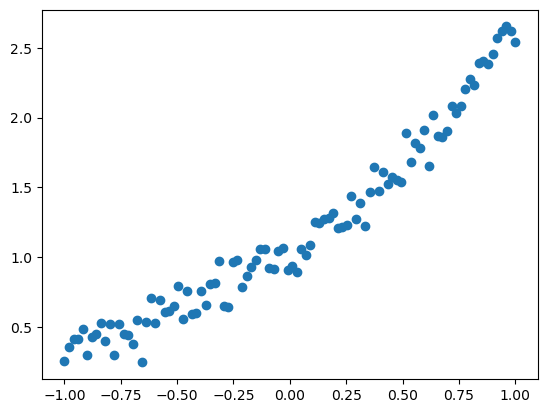

In [43]:
x = torch.linspace(-1, 1, 100)
# In the given example, torch.linspace(-1, 1, 100) creates a tensor x with 100 elements that are linearly 
# spaced between -1 and 1 (inclusive). The range -1 to 1 is divided into 100 equally spaced points.
# So, I have 100 examples in this case. 
y = f(x)
plt.scatter(x, y)
plt.show()

## Making a trainable function

We will attempt to approximate $f$ using a differentiable parameterized function $\hat{f}$ with much fewer parameters than the number of examples.

> Worth discussing with your friends: Why do we want much fewer parameters than the number of examples? 

#### Is it bc we need to adjust these parameters to fit the data set, so the least parameters we can use to adjust the data set, the better in terms of computing efficiency?.. not really bc we can use multiple threads to make it faster.. 

We will train parameters $\theta$ for $\hat{f}$ to minimize some differentiable loss function $L$ between $\hat{f}(x)$ and $y$ for all observations $(x, y)$.

We'll make a function such that we can repeatedly adjust $\theta$ against the gradient of $L$ with respect to $\theta$, at some learning rate $\lambda$. That is,

Do $\quad \theta \gets \theta - \lambda \nabla_\theta L(\hat{f}(x), y) \quad$ for all $(x, y)$ repeatedly until it's good enough.

Typical artificial neural networks (ANNs) are functions that allow us to do that. Let's make one kind of ANN called a multilayer perceptron (MLP), also called a feedforward neural network, also called a fully connected neural network.

For now, let $\hat{f}$ be an MLP that takes a **single scalar** input $x$ and outputs a number $\hat{y}$. We will make it handle a batch of inputs later.

I'M GUESSING WHAT I DON'T UNDERSTAND IS WHY DO WE NEED TO FOLLOW THESE THREE STEPS TO GET THIS F_HAT FUNCTION (FUNCTION THAT APPROXIMATES THE TARGET)... This is specificially for ANN, you want to introduce non linearlity so that the model can better learn (?) to adjust to the data? or can just better adjust to the data? 

Here is what will happen inside.
1. We apply a linear transformation. (to the scalar input)
2. We apply a nonlinear transformation.
3. We apply a linear transformation.

For the **first linear transformation**, we will multiply $x$ by a vector of 4 weights $\mathbf{W_1}$, and then add a vector of 4 biases $\mathbf{B_1}$ to that. I've given these parameters the subscript $\mathbf{_1}$ because they belong to the 1st linear transformation. Both $\mathbf{W_1}$ and $\mathbf{B_1}$ will be shaped $4 \times 1$. Let's call the result $\mathbf{Z}$.

$\mathbf{Z} = \mathbf{W_1} x + \mathbf{B_1}$


Next, we apply a **nonlinear transformation** to $\mathbf{z}$. There are many we can choose from, but we usually use the rectified linear unit (ReLU). It's just a function that returns the max of 0 and the input.

$\mathrm{ReLU}(z) = \max(0, z)$

Let's apply it element-wise to $\mathbf{Z}$ and call the result $\mathbf{A}$ for "activation."

$\mathbf{A} = \mathrm{ReLU}(\mathbf{Z})$

Because machine learning (ML) people tend to use brain analogies, 4 elements in $\mathbf{A}$ are often called *neurons*, i.e. there are 4 neurons in this layer. They're also called *hidden units*.

Next, we apply the **second linear transformation**. $\mathbf{A}$ is a $4 \times 1$ matrix. Since we want a single-element output, we must multiply it by a $1 \times 4$ matrix $\mathbf{W_2}$ and then add a $1 \times 1$ matrix $\mathbf{B_2}$.

$\hat{y} = \mathbf{W_2 A} + \mathbf{B_2}$

## Batching

Batching is an essential component in modern machine learning because it allows us to train functions quickly by leveraging parallel multiprocessors, i.e. graphics processing units (GPUs)... I'm assuming diff threads run diff batches

I NEED TO WRITE DOWN WHAT'S BELOW TO ACTUALLY VISUALIZE IT!!!!

Now suppose we want $\hat{f}$ to take a batch of inputs $\mathbf{X}$. We need to consider what shape $\mathbf{X}$ should be. The convention is to make the first dimension the batch dimension, followed by the shape of a single $x$. Since our $x$ is just a single number, our $\mathbf{X}$ is shaped $(\mathrm{batch\ size} \times 1)$. We also want $\hat{\mathbf{Y}}$, the batch of outputs from $\hat{f}$, to have the batch dimension first.

To do this, we transpose the $\mathbf{W}$ s, so that $\mathbf{W_1}$ is shaped $1 \times 4$ and $\mathbf{W_2}$ is shaped $4 \times 1$.

Then, we change $\hat{f}$ thus:
> Instead of multiplying $\mathbf{W_1}x$, we do $\mathbf{XW_1}$.

> Instead of multiplying $\mathbf{W_2 A}$, we do $\mathbf{AW_2}$.

Then $\hat{\mathbf{Y}}$ will be shaped $(\mathrm{batch\ size} \times 1)$. You can ponder about it and work out a few examples until you're convinced.

## Let's write it.

First, let's make sure $\mathbf{X}$ and $\mathbf{Y}$ are the shape we want.

In [44]:
x.shape, y.shape

(torch.Size([100]), torch.Size([100]))

Right now they're 1-dimensional arrays. We want to make them 2-dimensional by adding a second dimension of size 1.

In [45]:
x = x[:, None]
y = y[:, None]

Now check their shapes.

In [46]:
x.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

We can then write $\hat{f}$.

First, write a linear function that returns $\mathbf{Z}$ from $x$. It should be about one line of code.

In [47]:
def linear1(x: torch.Tensor, w1: torch.Tensor, b1: torch.Tensor) -> torch.Tensor:
    """
    :returns: z

    I usually write better docstrings, but that would just give you the solution.
    """
    return  x @ w1 + b1 # multiply matrices, then add bias... check the dimensions of the matrices, bias later 

Uncomment the following cell to see the solution.

In [50]:
base64.b64decode(b'cmV0dXJuIHggQCB3MSArIGIx').decode()

'return x @ w1 + b1'

Now implement the nonlinear function that returns $\mathbf{A}$. Take $\mathbf{Z}$ as input. One line.

In [51]:
def nonlinear(z: torch.Tensor) -> torch.Tensor:
    """
    :returns: a
    """
    return torch.relu(z)

In [52]:
base64.b64decode(b'cmV0dXJuIHRvcmNoLnJlbHUoeik=').decode()

'return torch.relu(z)'

Next, implement the second linear function that returns $\hat{y}$. Take $\mathbf{A}$ as input. One line.

In [53]:
def linear2(a: torch.Tensor, w2: torch.Tensor, b2: torch.Tensor) -> torch.Tensor:
    """
    :returns: y hat
    """
    return a @ w2 + b2 # w2 @ a + b2 or  a @ w2 + b2??????????????????????????????????????????????????? a bc if the explanation above 
# I want that the first dimension of y_hat has batch_size 

In [54]:
base64.b64decode(b'cmV0dXJuIGEgQCB3MiArIGIy').decode()

'return a @ w2 + b2'

Finally, write $\hat{f}$ as a composition of the first linear, the nonlinear, and the second linear functions. Instead of just returning $\hat{y}$, we're going to also return $\mathbf{Z}$ and $\mathbf{A}$ so we can use them to calculate gradients later. This should take about 3 lines of code.

In [55]:
def f_hat(x: torch.Tensor, 
          w1: torch.Tensor, 
          b1: torch.Tensor,
          w2: torch.Tensor, 
          b2: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    """
    :returns: a tuple (z, a, y hat)
    """
    # 
    z = linear1(x, w1, b1)
    a = nonlinear(z)
    y_hat = linear2(a, w2, b2)

    return z, a, y_hat

In [56]:
print(base64.b64decode(b'eiA9IGxpbmVhcjEoeCwgdzEsIGIxKQphID0gbm9ubGluZWFyKHopCnJldHVybiB6LCBhLCBsaW5lYXIyKGEsIHcyLCBiMik=').decode())

z = linear1(x, w1, b1)
a = nonlinear(z)
return z, a, linear2(a, w2, b2)


For our loss function, we can use the mean squared error $L = \text{MSE}(\hat{\mathbf{Y}}, \mathbf{Y}) = \dfrac{\sum_{i=1}^{|\mathbf{Y}|}(\hat{\mathbf{Y}_i} - \mathbf{Y}_i)^2}{|\mathbf{Y}|}$. I'll write this one for you.

In [57]:
def loss(y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    """
    :param y_hat: predictions
    :param y: labels
    :returns: the mean squared error between y_hat and y.



    The code you provided calculates the mean squared error (MSE) between the predicted values (y_hat) and the target 
    values (y). It doesn't require a loop because it operates on tensors, which can perform element-wise operations 
    efficiently without the need for explicit loops. In this case, y_hat - y calculates the difference between the 
    predicted values and the target values for each corresponding element in the tensors. 
    The expression (y_hat - y) ** 2 squares each element-wise difference, and .mean() computes the mean of all 
    squared differences, giving you the average MSE. By performing these operations directly on tensors, you leverage 
    the efficiency of tensor operations and can avoid the need for an explicit loop. The calculations are automatically
    applied element-wise across the tensors, allowing for faster computation compared to a loop-based implementation.
    """
    return ((y_hat - y) ** 2).mean()

To recap,
> We wanted a differentiable parameterized function that could approximate $f$. We now have this as $\hat{f}$.

> We also wanted a differentiable function that could capture the error between the output of $\hat{f}$ and the output of $f$. We now have this as $L$.

## Backpropagation

To know how to adjust the parameters, we must find the gradient of the loss function with respect to each parameter. Once we find that, we just nudge the parameters in a direction that decreases the loss. Because we can step backwards through the operations using the chain rule, this is called *backpropagation*, while applying $\hat{f}$ is called *forward propagation*.

Let's find the gradients from the back. In order to go from $L$ to all the parameters, we have to go through $\hat{y}$. What's $\nabla_{\hat{y}} L$?

In [58]:
def d_loss_wrt_y_hat(y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    """
    :param y_hat: predictions
    :param y: labels
    :returns: the derivative of the loss with respect to the predictions.
    """
    return (1/y_hat.shape[0])*2(y_hat - y)
# so, the length of y and y_hat is the same??

<>:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
/var/folders/rt/9z20cljs78966f3n2r99gzsw0000gn/T/ipykernel_1501/4274234860.py:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  return (1/y_hat.shape[0])*2(y_hat - y)


In [59]:
base64.b64decode(b'cmV0dXJuIDIgKiAoeV9oYXQgLSB5KQ==').decode()

'return 2 * (y_hat - y)'

Next, we have the $\mathbf{W_2}$ and $\mathbf{B_2}$ in our sights.

In [60]:
def d_y_hat_wrt_w2(a: torch.Tensor) -> torch.Tensor:
    """
    :param a: output of the nonlinear function
    :returns: the derivative of the second linear function with respect to w2.
    """
    # only the derivative of y_hat = AW2+B2 (no the derivative of the cost function when y_hat is the 
    # aforementioned expression)
    return a.sum(0)


# The 0 argument passed to sum indicates the dimension along which the summation is performed. In this case, 0 refers 
# to axis 0, which is the first dimension of a. Therefore, a.sum(0) calculates the sum of elements along axis 0.

# The result of a.sum(0) is a tensor that contains the sum of elements along axis 0. The specific shape and size of the 
# resulting tensor depend on the original shape and size of a.

# The returned value of a.sum(0) represents the derivative of the second linear function with respect to w2. 
# By summing along axis 0, it effectively computes the total effect of the elements of a on the derivative with 
# respect to w2.

def d_y_hat_wrt_b2() -> torch.Tensor:
    """
    :returns: the derivative of the second linear function with respect to b2.
    """
    return 1

Although $\mathbf{A}$ is not a parameter, we have to go through it in order to get to the other parameters.

In [ ]:
def d_y_hat_wrt_a(w2: torch.Tensor) -> torch.Tensor:
    """
    :returns: the derivative of the second linear function with respect to a.
    """
    return w2.sum()

$\mathbf{A}$ was the output of the nonlinear function, i.e. ReLU. Although in pure math, ReLU is not differentiable, we treat its derivative as 1 if its input is greater than 0 and 0 otherwise.

In [ ]:
def d_a_wrt_z(z: torch.Tensor) -> torch.Tensor:
    """
    :param z: the output of the first linear function
    :returns: the derivative of ReLU with respect to z
    """
    return z > 0 # this is a boolean tensor  

In [ ]:
# base64.b64decode(b'cmV0dXJuIHogPiAw').decode()

From $\mathbf{Z}$, we can see $\mathbf{W_1}$ and $\mathbf{B_1}$.

In [ ]:
def d_z_wrt_w1(x: torch.Tensor) -> torch.Tensor:
    """
    :param x: input examples
    :returns: the derivative of the first linear function with respect to w1
    """
    return x.mean()

In [ ]:
def d_z_wrt_b1() -> torch.Tensor:
    """
    :param x: input examples
    :returns: the derivative of the first linear function with respect to b1
    """
    return 1

# if you want the derivate of anything respect of sth, you want to cast it (the shape)n of that sth 

With this information, we can repeatedly update
* $\mathbf{W_2} \gets \mathbf{W_2} - \lambda \nabla_{\mathbf{W_2}} L$
* $\mathbf{B_2} \gets \mathbf{B_2} - \lambda \nabla_{\mathbf{B_2}} L$
* $\mathbf{W_1} \gets \mathbf{W_1} - \lambda \nabla_{\mathbf{W_1}} L$
* $\mathbf{B_1} \gets \mathbf{B_1} - \lambda \nabla_{\mathbf{B_1}} L$


until we approach the capability of $\hat{f}$ to approximate $f$. This update size is controlled by a usually small learning rate $\lambda$ that gets smaller over time. Here, we'll just keep it constant.

In the following function, fill in these gradients.
* $\nabla_{\mathbf{W_2}} L$
* $\nabla_{\mathbf{B_2}} L$
* $\nabla_{\mathbf{W_1}} L$
* $\nabla_{\mathbf{B_1}} L$

In [ ]:
LEARNING_RATE = 0.0001

def update_parameters(z: torch.Tensor,
                      a: torch.Tensor,
                      y_hat: torch.Tensor,
                      y: torch.Tensor,
                      w1: torch.Tensor,
                      b1: torch.Tensor,
                      w2: torch.Tensor,
                      b2: torch.Tensor) -> tuple[torch.Tensor, ...]:
    """
    Update the parameters by nudging them against the gradient of the loss with respect to the parameters.
    """

    d_loss_wrt_w2 = (d_loss_wrt_y_hat(y_hat, y) * d_y_hat_wrt_w2(a)).mean(0)
    d_loss_wrt_b2 = (d_loss_wrt_y_hat(y_hat, y) * d_y_hat_wrt_b2()).mean(0)
    d_loss_wrt_w1 = (d_loss_wrt_y_hat(y_hat, y) * d_y_hat_wrt_a(w2) * d_a_wrt_z(z) * d_z_wrt_w1(x)).mean(0)
    d_loss_wrt_b1 = (d_loss_wrt_y_hat(y_hat, y) * d_y_hat_wrt_a(w2) * d_a_wrt_z(z) * d_z_wrt_b1()).mean(0)

    w2 -= LEARNING_RATE * d_loss_wrt_w2[:, None]
    b2 -= LEARNING_RATE * d_loss_wrt_b2
    w1 -= LEARNING_RATE * d_loss_wrt_w1[None, :]
    b1 -= LEARNING_RATE * d_loss_wrt_b1

    return w1, b1, w2, b2

# IMPORT TENSORBOARD

Uncomment the following cell for a hint.

In [4]:
base64.b64decode(b'VXNlIHRoZSBjaGFpbiBydWxlLg==').decode()

'Use the chain rule.'

Another hint:

In [ ]:
# base64.b64decode(b'VGhlIGRlcml2YXRpdmUgb2YgYSBtZWFuIGlzIHRoZSBtZWFuIGRlcml2YXRpdmUu').decode()

Solutions:

In [5]:
 print(base64.b64decode(b'CmRfbG9zc193cnRfdzIgPSAoZF9sb3NzX3dydF95X2hhdCh5X2hhdCwgeSkgKiBkX3lfaGF0X3dydF93MihhKSkubWVhbigwKQpkX2xvc3Nfd3J0X2IyID0gKGRfbG9zc193cnRfeV9oYXQoeV9oYXQsIHkpICogZF95X2hhdF93cnRfYjIoKSkubWVhbigwKQpkX2xvc3Nfd3J0X3cxID0gKGRfbG9zc193cnRfeV9oYXQoeV9oYXQsIHkpICogZF95X2hhdF93cnRfYSh3MikgKiBkX2Ffd3J0X3ooeikgKiBkX3pfd3J0X3cxKHgpKS5tZWFuKDApCmRfbG9zc193cnRfYjEgPSAoZF9sb3NzX3dydF95X2hhdCh5X2hhdCwgeSkgKiBkX3lfaGF0X3dydF9hKHcyKSAqIGRfYV93cnRfeih6KSAqIGRfel93cnRfYjEoKSkubWVhbigwKQo=').decode())


d_loss_wrt_w2 = (d_loss_wrt_y_hat(y_hat, y) * d_y_hat_wrt_w2(a)).mean(0)
d_loss_wrt_b2 = (d_loss_wrt_y_hat(y_hat, y) * d_y_hat_wrt_b2()).mean(0)
d_loss_wrt_w1 = (d_loss_wrt_y_hat(y_hat, y) * d_y_hat_wrt_a(w2) * d_a_wrt_z(z) * d_z_wrt_w1(x)).mean(0)
d_loss_wrt_b1 = (d_loss_wrt_y_hat(y_hat, y) * d_y_hat_wrt_a(w2) * d_a_wrt_z(z) * d_z_wrt_b1()).mean(0)



Now we can write the gradient descent function. We will first initialize the parameters: the $\mathbf{W}$ s randomly and the $\mathbf{B}$ s to $\mathbf{0}$. Then start a loop for a number of iterations, called *epochs*, which is often decided beforehand, applying the updates to these parameters after each epoch.

In [ ]:
N_EPOCHS = 50000
N_HIDDEN_UNITS = 4

w1 = torch.randn(1, N_HIDDEN_UNITS)
b1 = torch.zeros(N_HIDDEN_UNITS)
w2 = torch.randn(N_HIDDEN_UNITS, 1)
b2 = torch.zeros(1)

def gradient_descent(w1: torch.Tensor, 
                     b1: torch.Tensor, 
                     w2: torch.Tensor, 
                     b2: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    """
    Optimize parameters through gradient descent.
    """
    
    for _ in (progress_bar := tqdm.tqdm(range(N_EPOCHS), desc="training")):
        z, a, y_hat = f_hat(x, w1, b1, w2, b2)
        w1, b1, w2, b2 = update_parameters(z, a, y_hat, y, w1, b1, w2, b2)
        progress_bar.set_postfix_str(f"loss: {loss(y_hat, y)}")

    return w1, b1, w2, b2

With just random parameters, $\hat{f}$ shouldn't be good at approximating $f$.

In [ ]:
plt.clf()
plt.scatter(x.cpu().numpy(), y)
plt.plot(x.cpu().numpy(), 
         f_hat(x, w1, b1, w2, b2)[2].cpu().numpy(), 
         color="red", 
         label="random parameters")
plt.legend()
plt.show()

In [ ]:
w1, b1, w2, b2 = gradient_descent(w1, b1, w2, b2)

In [ ]:
plt.clf()
plt.scatter(x.cpu().numpy(), y)
plt.plot(x.cpu().numpy(), 
         f_hat(x, w1, b1, w2, b2)[2].cpu().numpy(), 
         color="red", 
         label="trained parameters")
plt.legend()
plt.show()

# Stochastic gradient descent

Stochastic gradient descent (SGD) is just gradient descent, but instead of updating parameters after looking at all examples, you update them after looking at a smaller batch of them, called a minibatch, or just a batch. This may be necessary when all training data can't fit into your memory. An epoch is counted when you look at all examples once.

Suppose we use minibatches of size 32.

In [ ]:
BATCH_SIZE = 32

When training with SGD, you should shuffle your training data, just in case there's some order to them that would cause weird training behavior. The PyTorch way to do this is to create a PyTorch `Dataset` out of the data, and load it into your training loop with a `DataLoader`, which takes care of shuffling it every epoch.

In [ ]:
dataloader = data.DataLoader(data.TensorDataset(x, y), batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
def stochastic_gradient_descent(
        w1: torch.Tensor, 
        b1: torch.Tensor, 
        w2: torch.Tensor, 
        b2: torch.Tensor
    ) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    """
    Optimize parameters through stochastic gradient descent.
    """
    for _ in (progress_bar := tqdm.tqdm(range(N_EPOCHS), desc="training")):
        for x, y in dataloader:
            z, a, y_hat = f_hat(x, w1, b1, w2, b2)
            w1, b1, w2, b2 = update_parameters(z, a, y_hat, y, w1, b1, w2, b2)
            progress_bar.set_postfix_str(f"minibatch loss: {loss(y_hat, y)}")

    return w1, b1, w2, b2

Let's reinitialize the parameters and try it out.

In [ ]:
w1 = torch.randn(1, N_HIDDEN_UNITS)
b1 = torch.zeros(N_HIDDEN_UNITS)
w2 = torch.randn(N_HIDDEN_UNITS, 1)
b2 = torch.zeros(1)

w1, b1, w2, b2 = stochastic_gradient_descent(w1, b1, w2, b2)

In [ ]:
plt.clf()
plt.scatter(x.cpu().numpy(), y)
plt.plot(x.cpu().numpy(), 
         f_hat(x, w1, b1, w2, b2)[2].cpu().numpy(), 
         color="red", 
         label="trained parameters")
plt.legend()
plt.show()